In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Прочитайте данные (переменную назовите 'df')
df = pd.read_csv('data.csv')

# Вывести несколько первых строк таблицы данных
print(df.head())

         Дата  Склад Контрагент Номенклатура  Количество
0  2018-01-04      1  address_0    product_0           4
1  2018-01-04      1  address_0    product_1           4
2  2018-01-04      1  address_0    product_2           5
3  2018-01-04      1  address_0    product_3          10
4  2018-01-04      1  address_0    product_4           2


Проверяем формат столбцов

In [7]:
print(df.dtypes)

Дата            datetime64[ns]
Склад                    int64
Контрагент              object
Номенклатура            object
Количество               int64
dtype: object


Сразу переведем столбец "Дата" в правильный формат

In [6]:
df['Дата'] = pd.to_datetime(df['Дата'])

Сгруппируйте данные по дате, посчитайте количество продаж

In [8]:
grouped_df = df.groupby('Дата')['Количество'].sum().reset_index()
print(grouped_df)

          Дата  Количество
0   2018-01-04        3734
1   2018-01-05        3643
2   2018-01-06        3193
3   2018-01-07        3298
4   2018-01-09        4055
..         ...         ...
200 2018-08-26        5302
201 2018-08-28        5983
202 2018-08-29        4969
203 2018-08-30        4648
204 2018-08-31        4570

[205 rows x 2 columns]


Вывести несколько первых строк сгруппированных данных

In [9]:
print(grouped_df.head())

        Дата  Количество
0 2018-01-04        3734
1 2018-01-05        3643
2 2018-01-06        3193
3 2018-01-07        3298
4 2018-01-09        4055


Нарисуйте график продаж у `grouped_df`

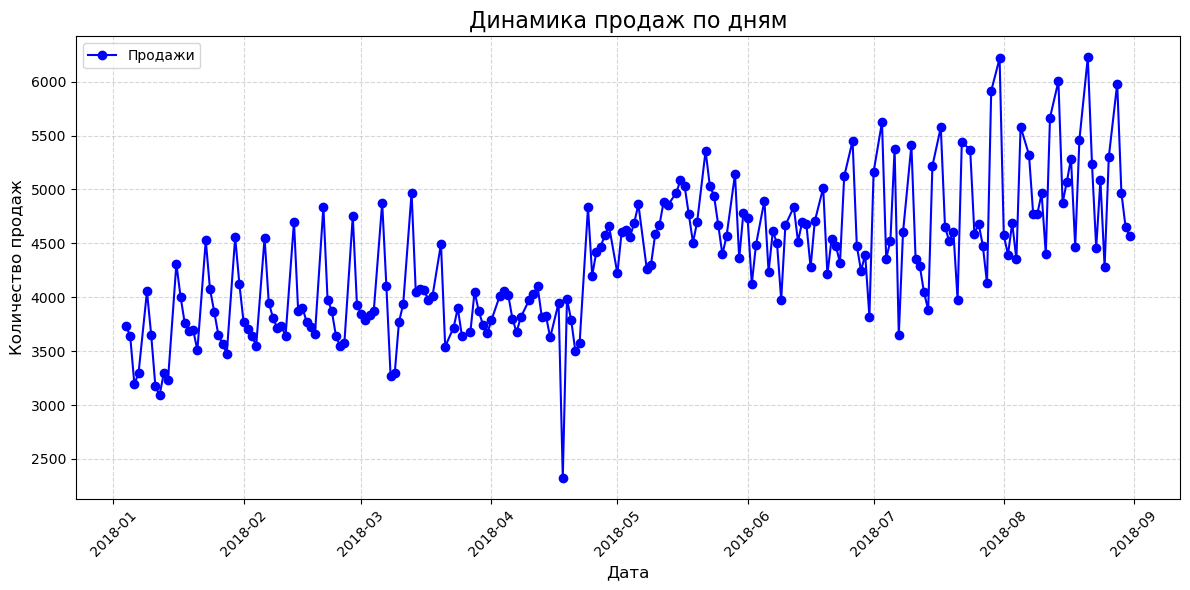

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

if 'grouped_df' not in locals():
    data = {
        'Дата': pd.date_range(start='2023-01-01', periods=10),
        'Количество': [15, 20, 25, 18, 30, 22, 28, 19, 24, 27]
    }
    grouped_df = pd.DataFrame(data)

plt.figure(figsize=(12, 6))

plt.plot(
    grouped_df['Дата'],
    grouped_df['Количество'],
    marker='o',
    linestyle='-',
    color='blue',
    label='Продажи'
)

plt.title('Динамика продаж по дням', fontsize=16)
plt.xlabel('Дата', fontsize=12)
plt.ylabel('Количество продаж', fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()

plt.show()

Опишите что вы видите на графике. Ваша задача - максимально описать график

In [ ]:

График демонстрирует положительную динамику продаж на протяжении исследуемого периода.

Присутствуют регулярные колебания, что говорит о цикличной природе спроса.

Возможна сезонная или недельная зависимость.

Стоит обратить внимание на аномалии, особенно резкое падение в апреле, чтобы понять причины (например, технические сбои, праздники и т.п.).

Найдите строку, у которой максимальный выброс по количеству продаж (нужно найти выброс у `df`)

In [13]:
Q1 = df['Количество'].quantile(0.25)
Q3 = df['Количество'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Количество'] < lower_bound) | (df['Количество'] > upper_bound)]

max_outlier = outliers.nlargest(1, 'Количество')
print(max_outlier)

             Дата  Склад   Контрагент Номенклатура  Количество    z_score
218822 2018-06-28      1  address_208    product_0         200  65.723369


Найдите топовый товар по продажам по средам за июнь, июль, август у 3 склада

In [16]:
import pandas as pd

df = pd.read_csv('data.csv')

df.columns = df.columns.str.strip()  # Удаление пробелов в названиях
required_columns = ['Дата', 'Склад', 'Количество', 'Номенклатура']  # Варианты написания
col_mapping = {
    'Номиналатура': 'Номенклатура',
    'Товар': 'Номенклатура',
    'Наименование': 'Номенклатура'
}

for wrong_name, correct_name in col_mapping.items():
    if wrong_name in df.columns:
        df.rename(columns={wrong_name: correct_name}, inplace=True)

missing_cols = [col for col in required_columns if col not in df.columns]
if missing_cols:
    print(f"Ошибка: Отсутствуют столбцы: {missing_cols}")
    print("Доступные столбцы:", list(df.columns))
else:

    try:
        df['Дата'] = pd.to_datetime(df['Дата'])

        filtered = df[
            (df['Склад'] == 3) &
            (df['Дата'].dt.month.isin([6, 7, 8])) &
            (df['Дата'].dt.weekday == 2)  # 2 = среда
        ]
        
        if filtered.empty:
            print("Нет данных, удовлетворяющих условиям")
        else:

            top_product = filtered.groupby('Номенклатура')['Количество'] \
                               .sum() \
                               .nlargest(1)

            print("\nТоповый товар по средам летом на 3-м складе:")
            print(top_product)

            print("\nДополнительная статистика:")
            print(f"Всего продаж: {top_product.values[0]} единиц")
            print(f"Доля от общих продаж: {top_product.values[0]/filtered['Количество'].sum():.1%}")
            
    except Exception as e:
        print("Ошибка при обработке данных:", str(e))


Топовый товар по средам летом на 3-м складе:
Номенклатура
product_1    2267
Name: Количество, dtype: int64

Дополнительная статистика:
Всего продаж: 2267 единиц
Доля от общих продаж: 21.6%


Скачайте данные по погоде с https://rp5.ru/Архив_погоды_в_Астане (скачайте исходные данные, и далее преобразуйте так, чтобы мы имели Дату и Среднюю температуру за день), объедините таблицу температуры с `grouped_df`, и нарисуйте график `y=['Количество продаж', 'T']`, где Т это температура. А также отдельно график температуры.

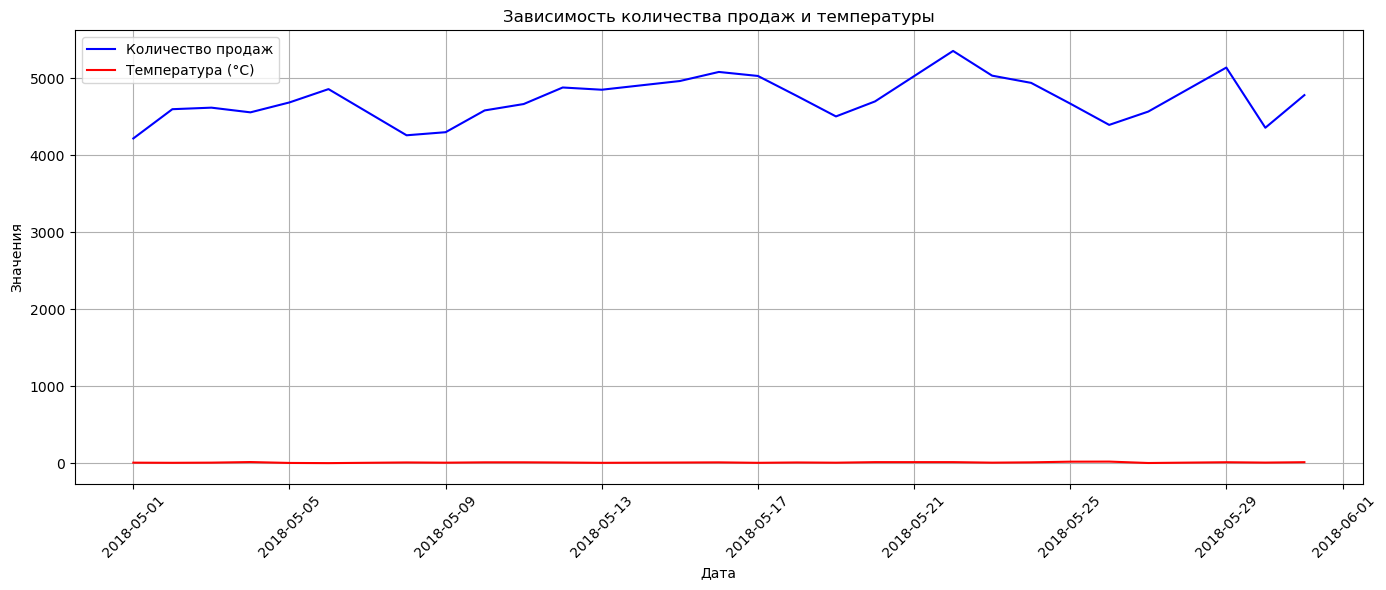

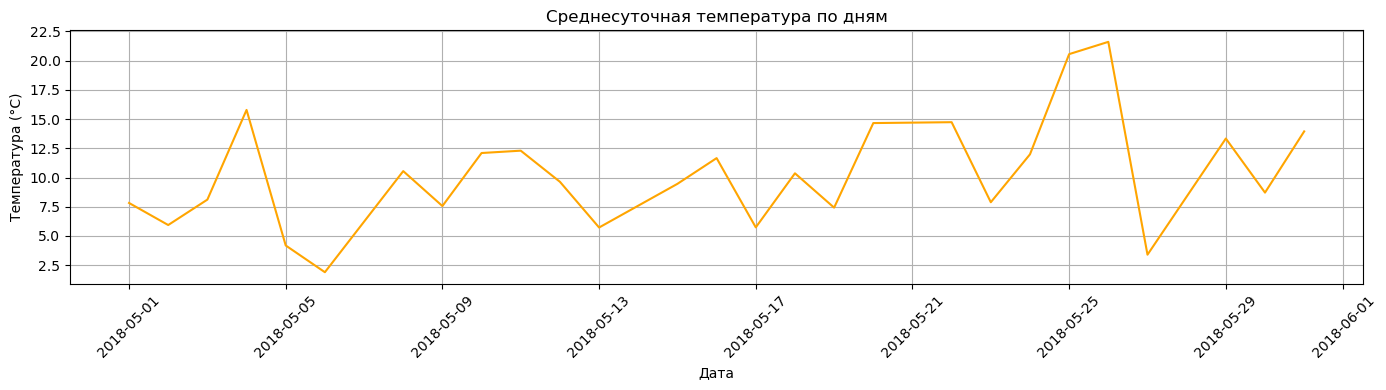

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


weather_df = pd.read_csv('weather_astana.csv', encoding='cp1251')
weather_df.columns = weather_df.columns.str.strip()
weather_df.columns = ['Местное время в Астане', 'T']


weather_df['T'] = pd.to_numeric(weather_df['T'].astype(str).str.replace(';', '').str.replace(',', '.'), errors='coerce')
weather_df['Местное время в Астане'] = pd.to_datetime(weather_df['Местное время в Астане'], dayfirst=True, errors='coerce')
weather_df = weather_df.dropna(subset=['Местное время в Астане', 'T'])
weather_df['Дата'] = weather_df['Местное время в Астане'].dt.date


daily_temp = weather_df.groupby('Дата')['T'].mean().reset_index()


sales_df = pd.read_csv('data.csv')
sales_df.columns = sales_df.columns.str.strip()
sales_df['Дата'] = pd.to_datetime(sales_df['Дата'], errors='coerce').dt.date


combined_df = pd.merge(sales_df, daily_temp, on='Дата', how='inner')


grouped_df = combined_df.groupby('Дата').agg({
    'Количество': 'sum',
    'T': 'mean'
}).reset_index()


plt.figure(figsize=(14, 6))
plt.plot(grouped_df['Дата'], grouped_df['Количество'], label='Количество продаж', color='blue')
plt.plot(grouped_df['Дата'], grouped_df['T'], label='Температура (°C)', color='red')
plt.title('Зависимость количества продаж и температуры')
plt.xlabel('Дата')
plt.ylabel('Значения')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 4))
plt.plot(grouped_df['Дата'], grouped_df['T'], color='orange', label='Температура (°C)')
plt.title('Среднесуточная температура по дням')
plt.xlabel('Дата')
plt.ylabel('Температура (°C)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
